# **DATA ANALYSIS PYTHON PROJECT - BLINKIT ANALYSIS**

## **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Import Raw Data**

In [2]:
df = pd.read_csv("C:\\Users\\ANKIT\\Downloads\\blinkit_data.csv")

## **Sample Data**

In [3]:
df.sample(4)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
253,Low Fat,FDG60,Baking Goods,2017,OUT035,Tier 2,Small,Supermarket Type1,0.060688,20.350,234.2616,5.0
1445,Low Fat,FDR07,Fruits and Vegetables,1998,OUT019,Tier 1,Small,Grocery Store,0.136120,NaN,94.1094,4.3
878,Regular,FDO22,Snack Foods,2011,OUT010,Tier 3,High,Grocery Store,0.029893,13.500,81.0960,4.5
7608,Low Fat,FDK28,Frozen Foods,2011,OUT010,Tier 3,Medium,Grocery Store,0.109784,5.695,256.0646,4.0


## **Size of Data**

In [4]:
print("Size of Data:",df.shape)

Size of Data: (8523, 12)


## **Field Info**

In [6]:
print("Columns name:",df.columns)

Columns name: Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')


## **Data Types**

In [8]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

## **Data Cleaning**

In [9]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [10]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF':'Low Fat','low fat': 'Low Fat','reg':'Regular'})

In [11]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


## **Business Requirements**

## **KPI's Requirements**

In [35]:
#Total sales
total_sales = df['Sales'].sum()

#Average sales
avg_sales = df['Sales'].mean()

#No of items sold
no_of_items_sold = df['Sales'].count()

#Average Ratings
avg_ratings = df['Rating'].mean()


#Display

print(f"Total Sales:${total_sales:,.1f}")
print(f"Average Sales:${avg_sales:,.1f}")
print(f"no of solds:{no_of_items_sold:,.0f}")
print(f"Average Rating:{avg_ratings:,.1f}")

Total Sales:$1,201,681.5
Average Sales:$141.0
no of solds:8,523
Average Rating:4.0


## **CHARTS REQUIREMENTS**

#### **Total sales by fat content**

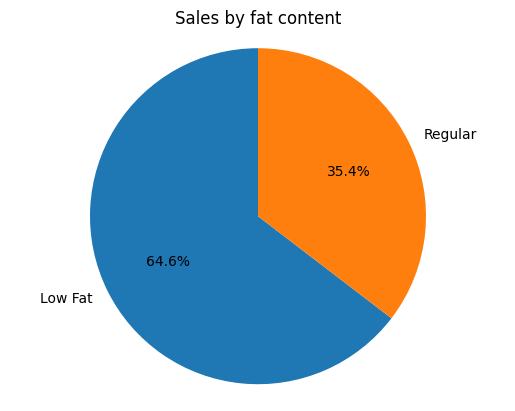

In [81]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()
plt.pie(sales_by_fat,labels = sales_by_fat.index,
                        autopct = '%.1f%%',
                        startangle = 90)
plt.title('Sales by fat content')
plt.axis('Equal')
plt.show()

#### **Total sales by Items types**

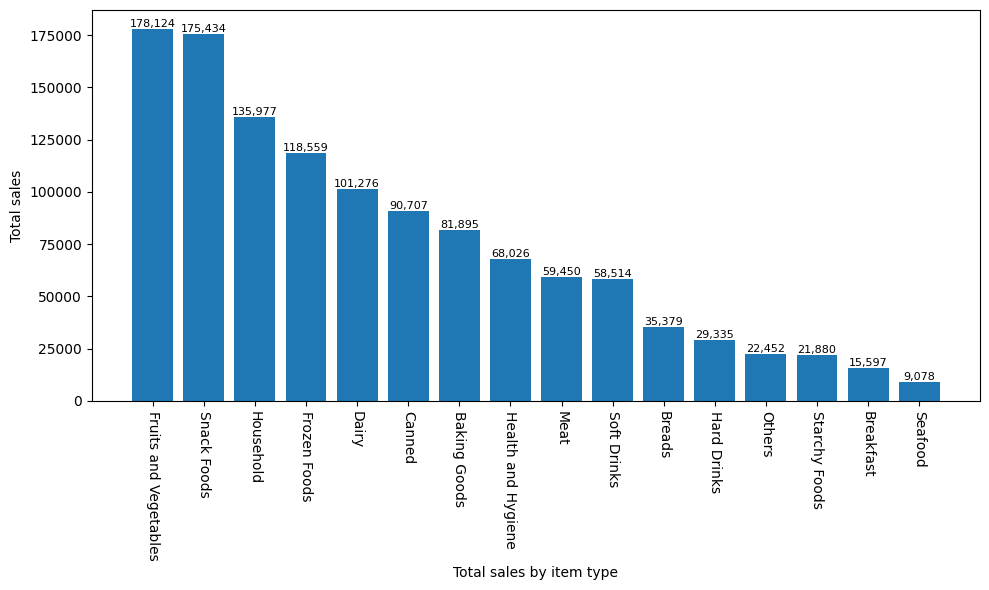

In [74]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
bars = plt.bar(sales_by_type.index,sales_by_type.values) # bar have 2 axis xaxis have we want label so index and yaxis
plt.xticks(rotation=-90) # bar distance 
plt.xlabel('Item Type')
plt.ylabel('Total sales')
plt.xlabel('Total sales by item type')
for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/2,bar.get_height(),
             f'{bar.get_height():,.0f}',ha='center',va='bottom',fontsize=8) # number label 
plt.tight_layout()
plt.show()
    
    

#### **Sales by Outlet Size**

In [56]:
# Outlet Size
df['Outlet Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

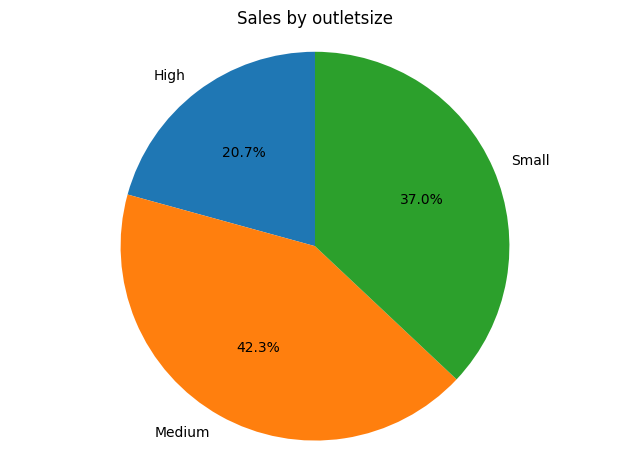

In [85]:
sales_by_outletsize = df.groupby('Outlet Size')['Sales'].sum()
plt.pie(sales_by_outletsize,labels = sales_by_outletsize.index,
                        autopct = '%.1f%%',
                        startangle = 90)
plt.title('Sales by outletsize')
plt.axis('Equal')
plt.tight_layout()
plt.show()

#### **Fat Content by Outlet for Total Sales**

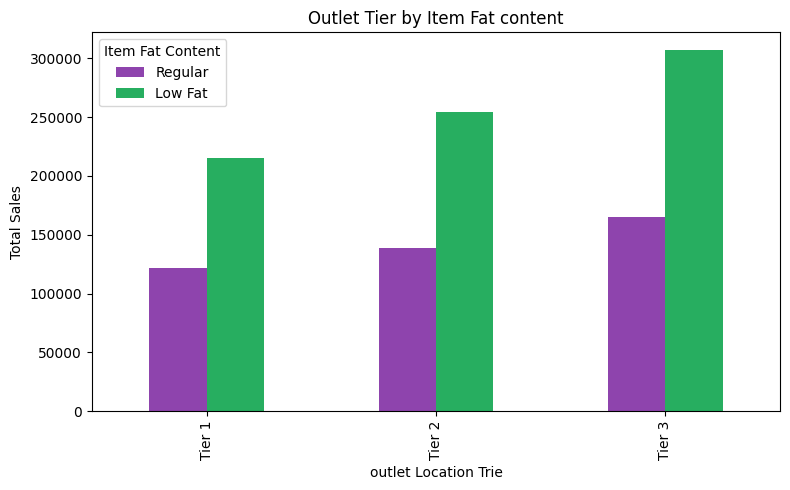

In [72]:
grouped = df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack() # unstack not overlaping in bars 
grouped = grouped[['Regular','Low Fat']]
colors = ['#8e44ad','#27ae60']
ax = grouped.plot(kind='bar',figsize=(8,5),title='Outlet Tier by Item Fat content',color=colors)
plt.xlabel('outlet Location Trie')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

#### **Total Sales by Outlet Establishment**

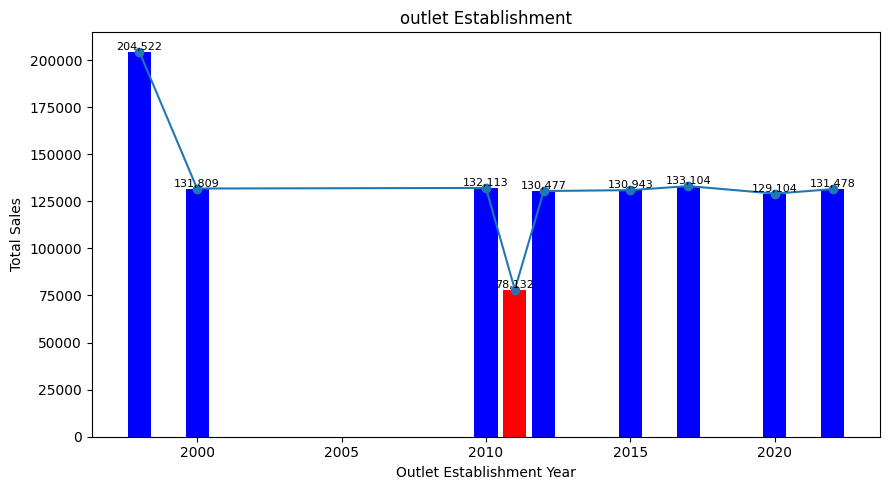

In [84]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index,sales_by_year.values,marker='o',linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('outlet Establishment')
colors = ['red' if y==sales_by_year.loc[2011]else 'blue' for y in sales_by_year.values]
plt.bar(sales_by_year.index,sales_by_year.values,color=colors)

for x,y in zip(sales_by_year.index,sales_by_year.values):
    plt.text(x,y,f'{y:,.0f}',ha='center',va='bottom',fontsize=8)
plt.tight_layout()
plt.show()

#keys insights: 1998 has the highest total sales = 204522 units.
2011 has a significant drop - only 78132 sales. this year is highlighted in red
other years (like 1999,2009,2010,2013,2015,2017,2020 and 2022) have relatively consistent sales ranging from 129000 to 133000.

#### **Sales By Outlet location**

In [ ]:
Outlet Location Type

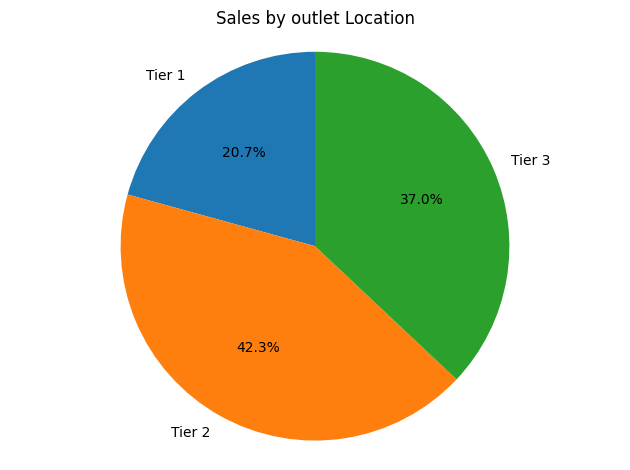

In [86]:
sales_by_outletlocation = df.groupby('Outlet Location Type')['Sales'].sum()
plt.pie(sales_by_outletsize,labels = sales_by_outletlocation.index,
                        autopct = '%.1f%%',
                        startangle = 90)
plt.title('Sales by outlet Location')
plt.axis('Equal')
plt.tight_layout()
plt.show()